In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

yf.pdr_override() 

In [2]:
es_df = pdr.DataReader("ES=F", start="2020-01-01", end="2022-12-31", period='1d')
es_df['Range'] = es_df['High'] - es_df['Low']
es_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75
...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50


In [3]:
es_df['Quantile_Volume'] = pd.qcut(es_df['Volume'], 10, labels= False) + 1

In [4]:
es_df['Quantile_Range'] = pd.qcut(es_df['Range'], 10, labels=False) + 1


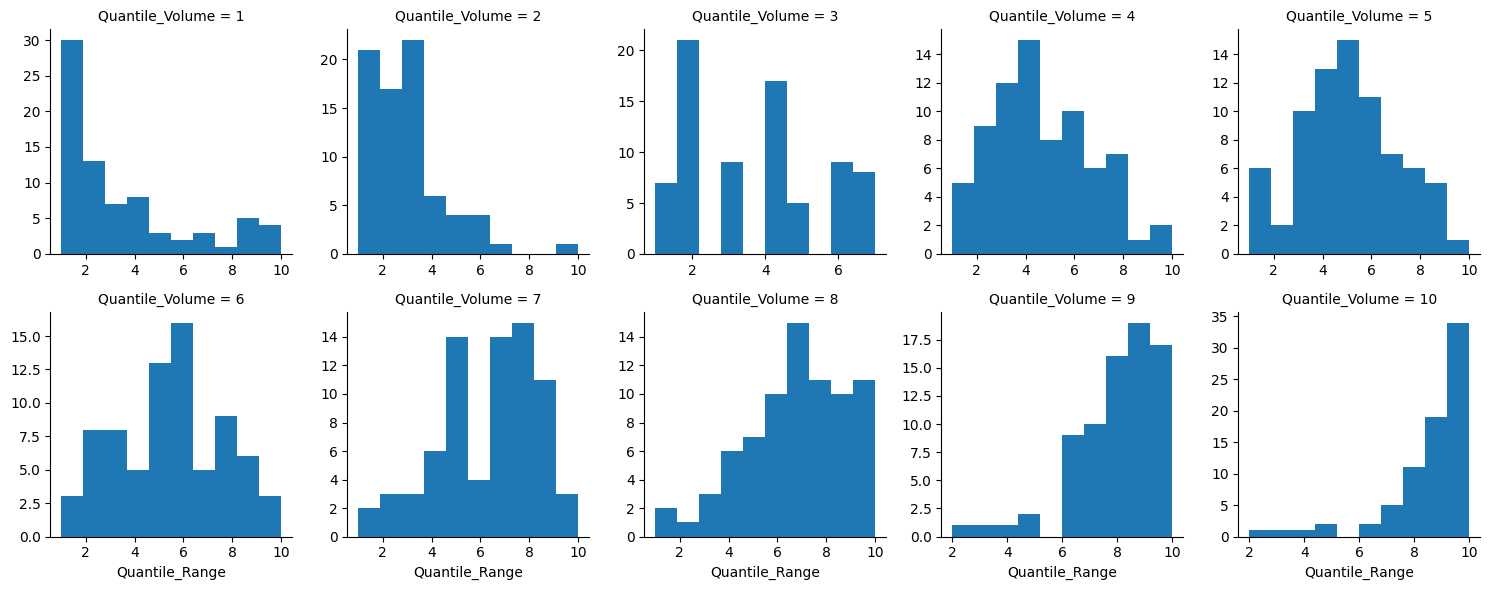

In [5]:
graph = sns.FacetGrid(es_df[["Quantile_Volume", "Quantile_Range"]], col="Quantile_Volume", sharex=False, sharey=False, col_wrap=5)
graph.map(plt.hist, 'Quantile_Range', bins=10)
plt.show()


In [6]:
es_df[['Quantile_Volume', 'Quantile_Range']].corr()


,Quantile_Volume,Quantile_Range
Quantile_Volume,1.000000,0.657759
Quantile_Range,0.657759,1.000000


In [7]:
np.corrcoef(es_df['Volume'].rank(pct=True),es_df['Range'].rank(pct=True))


array([[1.      , 0.665928],
       [0.665928, 1.      ]])

In [8]:
es_df

,Open,High,Low,Close,Adj Close,Volume,Range,Quantile_Volume,Quantile_Range
Date,,,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50,4,1
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75,7,5
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75,5,3
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50,3,2
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75,9,8
...,...,...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25,4,4
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25,1,6
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50,3,6


$$ Percent Range = \frac{High-Open}{Open}+\frac{Open-Low}{Open} $$

In [70]:
es_df["Perc_Range"] = (( ((es_df['High'] - es_df['Open']) / es_df['Open'])
                        + ((es_df["Open"] - es_df['Low']) / es_df['Open']) ) * 100).round(3)
es_df

,Open,High,Low,Close,Adj Close,Volume,Range,Quantile_Volume,Quantile_Range,Perc_Range
Date,,,,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50,4,1,0.850
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75,7,5,1.740
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75,5,3,1.265
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50,3,2,0.879
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75,9,8,2.684
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25,4,4,1.331
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25,1,6,1.631
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50,3,6,1.827


In [19]:
train = es_df.iloc[:500]
test = es_df.iloc[500:]

<Axes: xlabel='Date'>

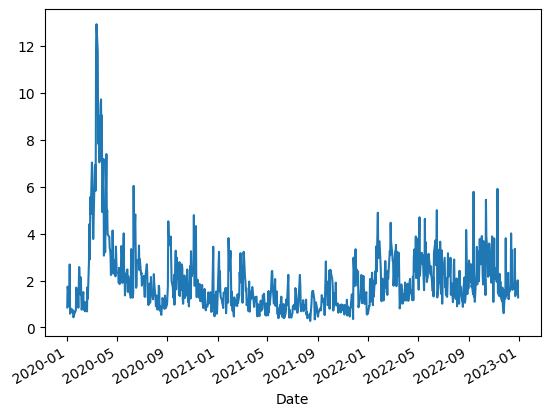

In [71]:
es_df['Perc_Range'].plot()